## Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    image_dir = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)

    path = os.path.join(image_dir, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
from sklearn.datasets import get_data_home


## Setup cont.

In [2]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]



## Import data

In [3]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

X, y = mnist["data"], mnist["target"]

## Split dataset

In [4]:
# Split the data so that the X_train gets the first 60000 values and X_test gets the remaining values. Do the same
# with the labels.

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Random shuffle

In [5]:
import numpy as np

shuffle_index = np.random.permutation(60000)

X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## 9. Use the second notebook to build your best solution and document its performance.

#### We will create two classifiers and see if they perform better than RandomForest or StochasticGradientDescent

In [6]:
# Create a GaussianNB Classifier

from sklearn.naive_bayes import GaussianNB
gaussianNBClassifier = GaussianNB()
gaussianNBClassifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [7]:
# Create a decision tree classifier

from sklearn.tree import DecisionTreeClassifier
decisionTreeClassifier = DecisionTreeClassifier(max_depth=5)
decisionTreeClassifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

In [9]:
# Get the scores for GaussianNB
gaussianNBScores = cross_val_score(gaussianNBClassifier, X_train, y_train, cv=5, scoring="accuracy")


In [10]:
# Get the scores for decisionTreeClassifier
decisionTreeScores = cross_val_score(decisionTreeClassifier, X_train, y_train, cv=3, scoring="accuracy")

In [11]:
print('Gaussian Naive Bayes Scores: ', gaussianNBScores)
print('mean score: ', gaussianNBScores.mean())

print('Decision Tree Scores: ', decisionTreeScores)
print('mean score: ', decisionTreeScores.mean())


Gaussian Naive Bayes Scores:  [0.56459808 0.55799033 0.56825    0.55922314 0.5626042 ]
mean score:  0.5625331519188734
Decision Tree Scores:  [0.67406519 0.66688334 0.66900035]
mean score:  0.669982960394108


In [12]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [13]:
gaussianNBPredictions = cross_val_predict(gaussianNBClassifier, X_train, y_train, cv=3)

In [14]:
decisionTreePredictions = cross_val_predict(decisionTreeClassifier, X_train, y_train, cv=3)

In [15]:
gaussianNBConfusionMatrix = confusion_matrix(y_train, gaussianNBPredictions)
gaussianNBConfusionMatrix

array([[5315,   12,   36,   21,    9,   17,  156,    5,  259,   93],
       [   4, 6371,   15,   35,    2,   11,   77,    4,  149,   74],
       [ 638,  187, 1679,  493,   31,   47, 1442,   16, 1338,   87],
       [ 459,  353,   49, 2266,   16,   12,  272,   52, 2036,  616],
       [ 180,   65,   49,   32,  988,   36,  504,   25, 1227, 2736],
       [ 710,  164,   34,  123,   34,  330,  269,   12, 3203,  542],
       [  71,  139,   32,    7,    6,   27, 5512,    0,  116,    8],
       [  30,   51,    8,   59,   59,   14,   15, 1920,  194, 3915],
       [ 118,  907,   25,   52,   22,   45,   96,    7, 3567, 1012],
       [  34,   62,   18,    7,   39,    5,    5,   88,  105, 5586]],
      dtype=int64)

In [16]:
decisionTreeConfusionMatrix = confusion_matrix(y_train, decisionTreePredictions)
decisionTreeConfusionMatrix

array([[4319,   10,   36,   69,   84,  312,  414,  169,  312,  198],
       [   2, 5542,  320,  115,    1,  135,   71,   81,  470,    5],
       [  87,  142, 3980,   45,  115,   83,  580,  316,  415,  195],
       [  51,  174,  301, 3536,   65,  681,  267,   93,  606,  357],
       [   8,  114,   49,   64, 3811,  196,  623,   21,  150,  806],
       [ 122,  130,   81,  435,  287, 1762,  842,   67, 1058,  637],
       [  86,   78,  333,   29,  440,  181, 4140,   28,  378,  225],
       [  10,   98,  208,   43,  229,   61,   46, 4686,  239,  645],
       [   2,  249,  234,  101,  105,  227,  612,   14, 4059,  248],
       [  20,  159,   59,  134,  239,  355,  261,   72,  286, 4364]],
      dtype=int64)

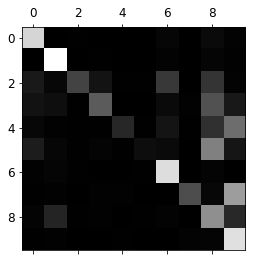

In [17]:
plt.matshow(gaussianNBConfusionMatrix, cmap=plt.cm.gray)
plt.show()

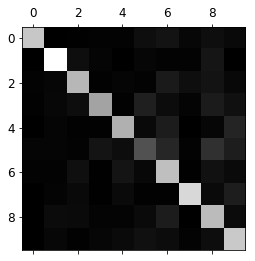

In [18]:
plt.matshow(decisionTreeConfusionMatrix, cmap=plt.cm.gray)
plt.show()

In [19]:
# Let's print precision and recall for both models

from sklearn.metrics import precision_score, recall_score

gaussianNBPrecision = precision_score(y_train, gaussianNBPredictions, average='macro')
gaussianNBRecall = recall_score(y_train, gaussianNBPredictions, average='macro')

decisionTreePrecision = precision_score(y_train, decisionTreePredictions, average='macro')
decisionTreeRecall = recall_score(y_train, decisionTreePredictions, average='macro')

print("Gaussian Naive Bayes Precision: ",gaussianNBPrecision)
print("Gaussian Naive Bayes Recall: ",gaussianNBRecall)

print("Decision Tree Precision: ",decisionTreePrecision)
print("Decision Tree Precision Recall: ",decisionTreeRecall)



Gaussian Naive Bayes Precision:  0.6726385973625082
Gaussian Naive Bayes Recall:  0.5510199727253081
Decision Tree Precision:  0.6828640455910635
Decision Tree Precision Recall:  0.6648152262239531
